In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

# Main data directory and parameters
DATA_DIR = '/workspaces/Plant-Disease-CNN/data/PlantVillage'  
IMG_SIZE = (128, 128)           # Image size for resizing
BATCH_SIZE = 32                 # Number of images per batch
SEED = 42                       # For reproducibility

Sample classes: ['Tomato_Septoria_leaf_spot', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato__Tomato_mosaic_virus']


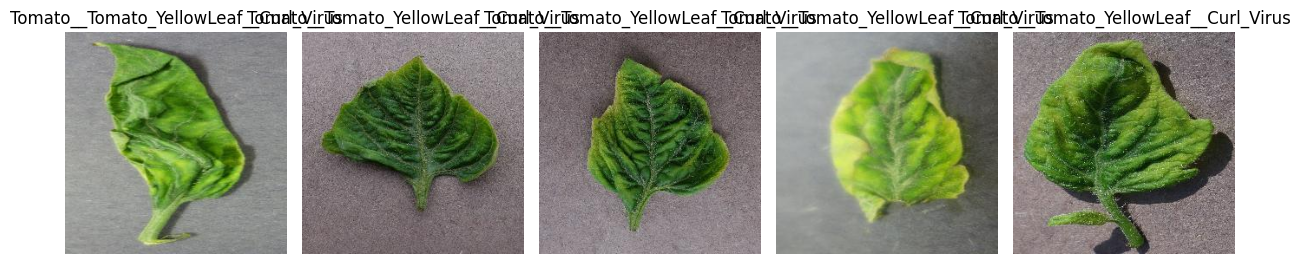

In [9]:
import random
from PIL import Image

classes = os.listdir(DATA_DIR)
print("Sample classes:", classes[:5])

# Visualize some images from random classes
sample_class = random.choice(classes)
sample_img_paths = os.listdir(os.path.join(DATA_DIR, sample_class))[:5]

plt.figure(figsize=(12,3))
for i, img_name in enumerate(sample_img_paths):
    img_path = os.path.join(DATA_DIR, sample_class, img_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(sample_class)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [12]:
augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_train_generator = augmented_train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED
)

Found 16516 images belonging to 15 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/workspaces/Plant-Disease-CNN/data/PlantVillage_test', 
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
    
)

Found 2591 images belonging to 2 classes.
